In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### PCA

In [13]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

Principal component analysis is a generic technique for converting high dimensional data to lower dimensions. We won't cover how it works at all in this lecture, but we'll see what it does, roughly.

In [15]:
from sklearn.decomposition import PCA

First we create a `PCA` object, and tell it how many features we want to generate.

In [16]:
pca_transformer = PCA(n_components=2)

In [17]:
pca_transformer.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

If we now call `transform`, we see that all of our images is represented now by 2 features.

In [18]:
X_train_pca = pca_transformer.transform(X_train)
X_train_pca

array([[  568.58845935,  -645.36588514],
       [ -201.92982734,  -868.47735568],
       [  206.90363151,   -82.97398892],
       ...,
       [ -979.13193352,  -370.82685518],
       [ 1214.80886953,  -424.96503598],
       [  782.89542874, -1074.75827279]])

In [19]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train_pca, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
X_test_pca = pca_transformer.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score

lm_predictions_train_pca = lm.predict(X_train_pca)
lm_predictions_test_pca = lm.predict(X_test_pca)
print(f"Training Accuracy: {accuracy_score(y_train, lm_predictions_train_pca)}")
print(f"Test Accuracy: {accuracy_score(y_test, lm_predictions_test_pca)}")

Training Accuracy: 0.43294243070362476
Test Accuracy: 0.4358874458874459


We see that despite having only 2 features (instead of 784), we manage to achieve 44% accuracy. Not bad, given how few features we used.

Another interesting thing we can do is plot our data on a 2D plot, annotated by the class.

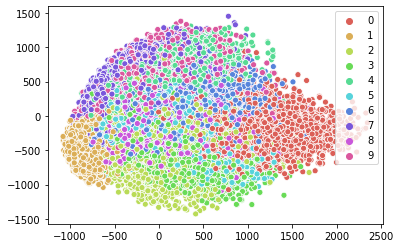

In [22]:
sns.scatterplot(x=X_train_pca[:, 0],
                y=X_train_pca[:, 1],
                palette=sns.color_palette("hls", 10),
                hue=y_train)

#### PCA and Clustering on State Data

In [26]:
df = pd.read_csv(r"data_set\presidential-elections.csv")
df

,State,1789,1792,1796,1800,Unnamed: 5,1804,1808,1812,1816,...,1988,1992,1996,2000 ‡,Unnamed: 60,2004,2008,2012,2016 ‡,State.1
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,NaN,R,R,R,R,Alabama
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,NaN,R,R,R,R,Alaska
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,D,R,NaN,R,R,R,R,Arizona
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,D,R,NaN,R,R,R,R,Arkansas
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,D,D,NaN,D,D,D,D,California
5,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,R,R,NaN,R,D,D,D,Colorado
6,Connecticut,GW,GW,F,F,NaN,F,F,F,F,...,R,D,D,D,NaN,D,D,D,D,Connecticut
7,Delaware,GW,GW,F,F,NaN,F,F,F,F,...,R,D,D,D,NaN,D,D,D,D,Delaware
8,D.C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,D,D,NaN,D,D,D,D,D.C.
9,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,D,R,NaN,R,D,D,R,Florida


In [27]:
df_1972_to_2016 = (df.iloc[:, -14:].drop(['Unnamed: 60'],
                                         axis=1).rename(columns={
                                             "2000 ‡": "2000",
                                             "2016 ‡": "2016",
                                             "State.1": "State"
                                         }).drop([25, 52]).set_index("State"))

In [28]:
df_1972_to_2016 = df_1972_to_2016.replace("R", 1)
df_1972_to_2016 = df_1972_to_2016.replace("D", 0)

In [32]:
df_1972_to_2016

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
State,,,,,,,,,,,,
Alabama,1,0,1,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,1,1,1,1,1,1,1,1,1
Arizona,1,1,1,1,1,1,0,1,1,1,1,1
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1
California,1,1,1,1,1,0,0,0,0,0,0,0
Colorado,1,1,1,1,1,0,1,1,1,0,0,0
Connecticut,1,1,1,1,1,0,0,0,0,0,0,0
Delaware,1,0,1,1,1,0,0,0,0,0,0,0
D.C.,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_1972_to_2016.loc["Massachusetts":"Nevada", :]

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
State,,,,,,,,,,,,
Massachusetts,0,0,1,1,0,0,0,0,0,0,0,0
Michigan,1,1,1,1,1,0,0,0,0,0,0,1
Minnesota,1,0,0,0,0,0,0,0,0,0,0,0
Mississippi,1,0,1,1,1,1,1,1,1,1,1,1
Missouri,1,0,1,1,1,0,0,1,1,1,1,1
Montana,1,1,1,1,1,0,1,1,1,1,1,1
Nebraska,1,1,1,1,1,1,1,1,1,1,1,1
Nevada,1,1,1,1,1,0,0,1,1,0,0,0


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

state_data_dimensionality_reducer = Pipeline([('scale', StandardScaler()),
                                              ('pca', PCA(n_components=2))])

state_data_dimensionality_reducer.fit(df_1972_to_2016)
state_vote_data_2d = pd.DataFrame(
    state_data_dimensionality_reducer.transform(df_1972_to_2016),
    columns=["pc1", "pc2"])
state_vote_data_2d["state"] = list(df_1972_to_2016.index)

In [34]:
state_vote_data_2d

,pc1,pc2,state
0,-2.733898,0.878935,Alabama
1,-2.854135,-0.068869,Alaska
2,-2.187073,-0.161736,Arizona
3,-1.399352,0.733236,Arkansas
4,2.117444,-1.848357,California
5,-0.059500,-1.355139,Colorado
6,2.117444,-1.848357,Connecticut
7,2.237681,-0.900553,Delaware
8,4.981848,5.251487,D.C.
9,-0.622666,-0.104215,Florida


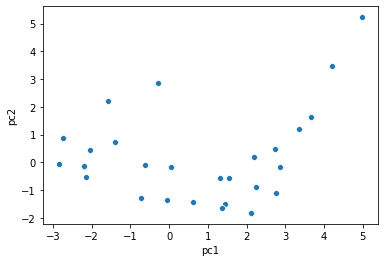

In [35]:
sns.scatterplot(data=state_vote_data_2d, x="pc1", y="pc2")

Or we can create a nicer plot with labels with the code below (requires plotly).

In [36]:
state_vote_data_2d_df = pd.DataFrame(state_vote_data_2d, columns=["pc1", "pc2"])

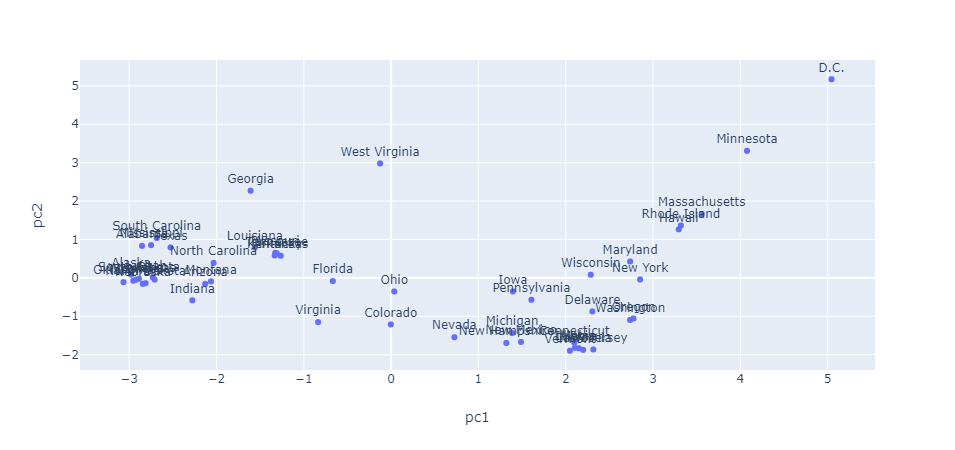

In [38]:
state_vote_data_2d_df = pd.DataFrame(state_vote_data_2d, columns=["pc1", "pc2"])
state_vote_data_2d_jittered_df = np.random.normal(
    0, 0.1, state_vote_data_2d_df.shape) + state_vote_data_2d_df

import plotly.express as px
state_names = list(df_1972_to_2016.index)
state_vote_data_2d_jittered_df["state"] = state_names
fig = px.scatter(state_vote_data_2d_jittered_df, x="pc1", y="pc2", text="state")

fig.update_traces(textposition='top center')

#### Clustering on Iris Data

In [46]:
iris = pd.read_csv(r"data_set\iris.csv")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
89,5.5,2.5,4.0,1.3,versicolor
87,6.3,2.3,4.4,1.3,versicolor
133,6.3,2.8,5.1,1.5,virginica
98,5.1,2.5,3.0,1.1,versicolor
146,6.3,2.5,5.0,1.9,virginica
123,6.3,2.7,4.9,1.8,virginica
43,5.0,3.5,1.6,0.6,setosa
45,4.8,3.0,1.4,0.3,setosa
33,5.5,4.2,1.4,0.2,setosa


In [47]:
iris = iris.drop("species", axis=1)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
31,5.4,3.4,1.5,0.4
36,5.5,3.5,1.3,0.2
55,5.7,2.8,4.5,1.3
119,6.0,2.2,5.0,1.5
118,7.7,2.6,6.9,2.3
80,5.5,2.4,3.8,1.1
73,6.1,2.8,4.7,1.2
8,4.4,2.9,1.4,0.2
25,5.0,3.0,1.6,0.2
20,5.4,3.4,1.7,0.2


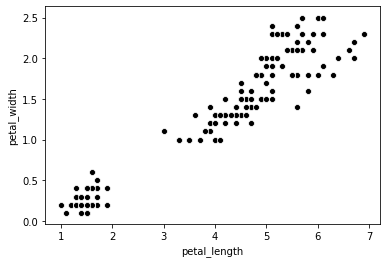

In [48]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", color="black")

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(iris[["petal_length", "petal_width"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster_nums = km.predict(iris[["petal_length", "petal_width"]])
cluster_nums

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 3, 2, 3, 2, 2, 3, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3,
       2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2])

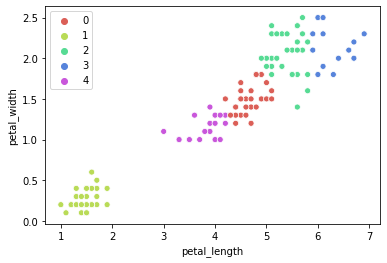

In [51]:
sns.scatterplot(data=iris,
                x="petal_length",
                y="petal_width",
                hue=cluster_nums,
                palette=sns.color_palette("hls", 5))

In [52]:
from sklearn.cluster import AgglomerativeClustering

#single linkage means use the MINIMUM distance between points in two clusters
ac = AgglomerativeClustering(linkage="single", n_clusters=2)
cluster_nums = ac.fit_predict(iris[["petal_length", "petal_width"]])

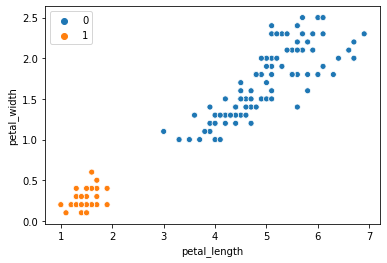

In [53]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue=cluster_nums)